# 预备知识

**导数与微分**


In [8]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
# from IPython.display import set_matplotlib_formats
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


为了对导数的这种解释进⾏可视化，我们将使⽤matplotlib，这是⼀个Python中流⾏的绘图库。要配
置matplotlib⽣成图形的属性，我们需要定义⼏个函数。在下⾯，use_svg_display函数指定matplotlib软件
包输出svg图表以获得更清晰的图像。


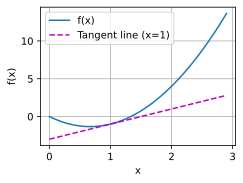

In [9]:
def use_svg_display(): #@save
    """Use the svg format to display a plot in Jupyter."""
    # display.set_matplotlib_formats('svg')
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)): #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """A utility function to set matplotlib axes."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'),
            figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果 `X` 有一个轴，输出 `True`
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

**概率**

机器学习就是做出预测。

投骰子试验，骰子的每一面出现的概率是相等的（理想骰子）。

In [10]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

对投骰子试验进行1000次采样，得到相同分布的事件概率，即每一面出现的概率为 $\frac{1}{6}$

In [11]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计的概率

tensor([0.1670, 0.1820, 0.1620, 0.1570, 0.1650, 0.1670])

我们也可以看到这些概率如何随着时间的推移收敛到真实概率。让我们进⾏500组实验，每组抽取10个样本。

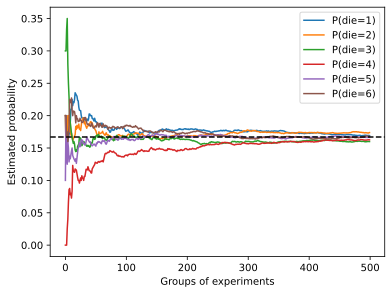

In [12]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)

estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

每条实线对应于骰⼦的6个值中的⼀个，并给出骰⼦在每组实验后出现值的估计概率。当我们通过更多的实
验获得更多的数据时，这6条实体曲线向真实概率收敛。